Accuracy: 0.99

Confusion Matrix:
 [[19800     0]
 [  200     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



C:\Users\MAYUSHREE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\MAYUSHREE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\MAYUSHREE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

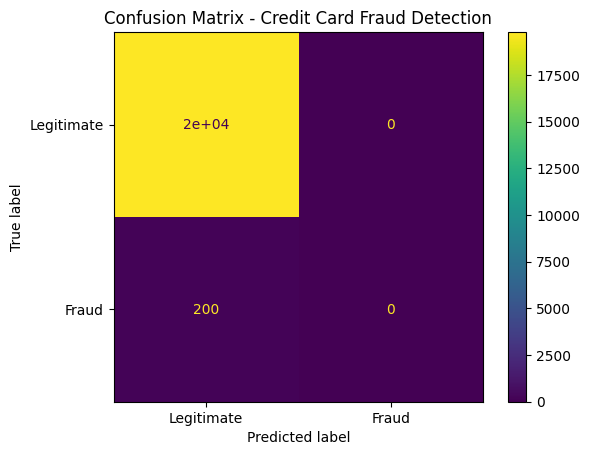

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("credit_card_fraud_dataset.csv")

# Drop unnecessary columns
df = df.drop(["TransactionID", "TransactionDate"], axis=1)

# Encode categorical variables
df = pd.get_dummies(df, columns=["TransactionType", "Location"], drop_first=True)

# Split features and target
X = df.drop("IsFraud", axis=1)
y = df["IsFraud"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Reports
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Legitimate", "Fraud"]
)

disp.plot()
plt.title("Confusion Matrix - Credit Card Fraud Detection")
plt.show()




In [7]:
# -------------------------
# TEST WITH NEW EXAMPLE
# -------------------------

example_transaction = pd.DataFrame({
    "Amount": [4500],
    "MerchantID": [500]
})

example_transaction = example_transaction.reindex(columns=X.columns, fill_value=0)

example_scaled = scaler.transform(example_transaction)

prediction = model.predict(example_scaled)

if prediction[0] == 1:
    print("⚠️ Example Prediction: Fraudulent Transaction")
else:
    print("✅ Example Prediction: Legitimate Transaction")

✅ Example Prediction: Legitimate Transaction
